Import Libraries

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

VFILE = "video/hot_rod.mp4"

Define generator for reading video

In [5]:
def get_frames(filename):
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            yield frame
        else:
            break
            
    video.release()
    yield None
    

Retrieve and display video frames

In [6]:
#Loop through video using the generator from last cell
for f in get_frames(VFILE):
    #When generator gets to the end of the movie it wll return None
    # so if we get None then we break from the loop
    if f is None:
        break
    #Use the imshow() function to display the frame
    #We pass 2 arguments to it (title of display window, and f) If you look when we declared the loop "f" is the individual frame
    cv2.imshow('frame', f)
    # This listens for the Esc key to stop video
    if cv2.waitKey(10) == 27:
        break

#This is to free up all resources used 
cv2.destroyAllWindows()

### At this point if you run the cell, the video should start playing. 
### Press Esc to stop video

Code to pull and individual frame

In [9]:
def get_frame(filename, index):
    counter = 0
    video = cv2.VideoCapture(filename)
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            if counter == index:
                return frame
            counter += 1
        else:
            break
    video.release()
    return None

Fix the color of frame (OpenCV uses BGR instead of RGB)

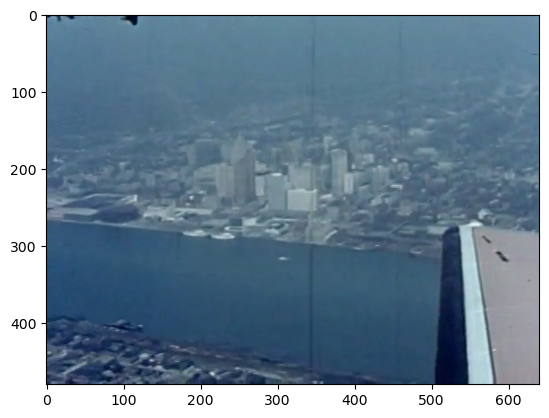

In [10]:
frame = get_frame(VFILE, 25)
fix_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(fix_frame)

Add counter to each frame

In [11]:
# Process all video frames
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    # Add counter
    cv2.putText(frame, 
                text=str(counter), 
                org=(100,100), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=1, 
                color=(0,255,0),
                thickness=3)
    cv2.imshow('frame', frame)
    
    # Hit Escape to stop
    if cv2.waitKey(10) == 27:
        break
    counter += 1
    
cv2.destroyAllWindows()

Save video as mp4

In [ ]:
# FourCC is a 4-byte code used to specify the video codec.
fourcc = cv2.VideoWriter_fourcc('M', 'P', '4', 'V')
video_out = cv2.VideoWriter("new.mp4", fourcc, 20, (640,480))

# Process all video frames
counter = 0
for frame in get_frames(VFILE):
    if frame is None:
        break
    # Add counter
    cv2.putText(frame, 
                text=str(counter), 
                org=(100,100), 
                fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                fontScale=1, 
                color=(0,255,0),
                thickness=3)
#    cv2.imshow('frame', frame)
    
    # Hit Escape to stop
#    if cv2.waitKey(10) == 27:
#        break
    video_out.write(frame)
    counter += 1
video_out.release()